# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [149]:
# Reading data
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [150]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#inplace return copy of dataframe


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Reading

How many years of data are logged in our dataset? 

In [151]:
# getting the maximum of year minus the minimum of year
print(df["YEAR"].max() - df["YEAR"].min())
# print(df["YEAR"].min())
# print(2019-1992)

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [152]:
# Group data by states and get its AVG_READING_4_SCORE's mean throughout the year
states = df.groupby('STATE')["AVG_READING_4_SCORE"].mean()
Michigan = states["MICHIGAN"]
Ohio = states["OHIO"]
if Michigan > Ohio:
    print("Michigan")
else:
    print("Ohio")
# Ohio has the higehr average across all years in 4th grade reading score


Ohio


Find the average for your chosen test across all states in 2019

In [153]:
# Assigning data with year equal to 2019 to df2019
df2019 = df.loc[df['YEAR'] == 2019]
# Group df2019 by states and find the test's means
states = df2019.groupby(['STATE'])['AVG_READING_4_SCORE'].mean()
print(states)

STATE
ALABAMA                 212.0
ALASKA                  204.0
ARIZONA                 216.0
ARKANSAS                215.0
CALIFORNIA              216.0
COLORADO                225.0
CONNECTICUT             224.0
DELAWARE                218.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 225.0
GEORGIA                 218.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                218.0
INDIANA                 222.0
IOWA                    221.0
KANSAS                  219.0
KENTUCKY                221.0
LOUISIANA               210.0
MAINE                   221.0
MARYLAND                220.0
MASSACHUSETTS           231.0
MICHIGAN                218.0
MINNESOTA               222.0
MISSISSIPPI             219.0
MISSOURI                218.0
MONTANA                 222.0
NATIONAL                220.0
NEBRASKA                222.0
NEVADA                  218.0
NEW_HAMPSHIRE           224.0
NEW_JERSEY              227.0
NEW_

For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [154]:
# Group data by state and find the maximum value of the test
states = df.groupby(['STATE'])['AVG_READING_4_SCORE'].max()
print(states)

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [155]:
# Instruction expenditure spent on (4th grade out of all grade) 
df["expenditure_per_4_student"] = df["INSTRUCTION_EXPENDITURE"] * (df["ENROLL_4"]/df["ENROLL_ALL"])
# The ratio of instruction expenditure to total expenditure
df["educational_state_expenditure_ratio"] = df["INSTRUCTION_EXPENDITURE"] / df["TOTAL_EXPENDITURE"]

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

For the first features, I made the changes because I want to see how much the state will give for 4th grade studies.  
For the second features, I want to see how much percentage the state spend on Instruction expenditure out of their total expenditure 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

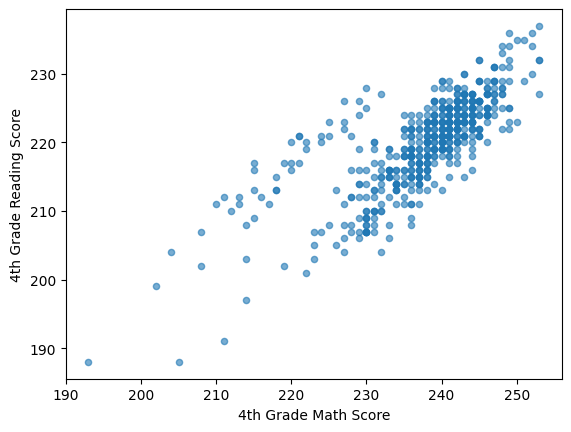

In [156]:
# Scatter plot of 4th grade math score as predictor and 4th grade reading score as response variable
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('4th Grade Math Score')
plt.ylabel('4th Grade Reading Score')

**<CAPTION FOR VIZ 1>**
The data shows that 4th grade math score is proportional to 4th grade reading score. (If the state or grade is good in reading, they are also almost similarly good in math.)

**Visualization 2**

Text(0, 0.5, '4th Grade Reading Score')

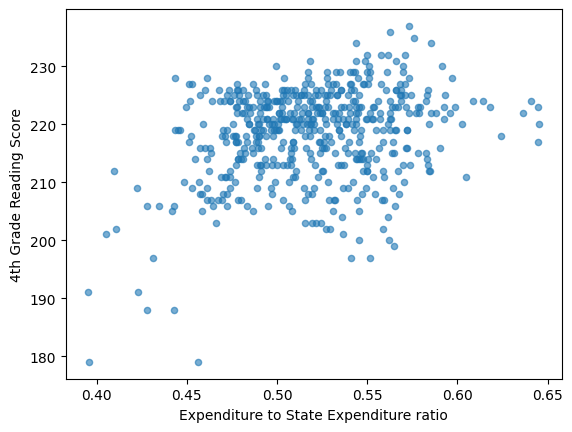

In [157]:
df.plot.scatter(x='educational_state_expenditure_ratio', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('Expenditure to State Expenditure ratio')
plt.ylabel('4th Grade Reading Score')

**<CAPTION FOR VIZ 2>**
The scatterplot shows that a lot of 4th grade reading score reached above 210 when ratio of instruction expenditure to state expenditure were above 45%.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [158]:
# import train test split function
from sklearn.model_selection import train_test_split

In [159]:
# Assigned value to input variable
X = df[['ENROLL_4', 'AVG_MATH_4_SCORE', 'educational_state_expenditure_ratio']].dropna()
# Assigned value to output variable
y = df.loc[X.index]['AVG_READING_4_SCORE']
# Fill in na value with y mean
y.fillna(y.mean(), inplace=True)

In [160]:
# Split the data with 40% of the data as test data
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.4, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [161]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [162]:
# create your model here
model = LinearRegression()

In [163]:
model.fit(X_train, y_train)

LinearRegression()

In [164]:
y_pred = model.predict(X_test)

In [175]:
# the intercepts and coefficients the model generates
print(model.intercept_)
print(model.coef_)

92.6081884126929
[-5.45148921e-06  4.56189174e-01  3.80909877e+01]


In [176]:
# R^2 value describes how well a linear model fits the data
# It ranges between 0 and 1
# There are many caveats to R^2 but it is a good starting point
model.score(X_test, y_test)

0.5377911567240721

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [171]:
np.mean(model.predict(X_test)-y_test)

-0.187815140435075

In [172]:
np.mean(np.abs(model.predict(X_test)-y_test))

3.854904350942488

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

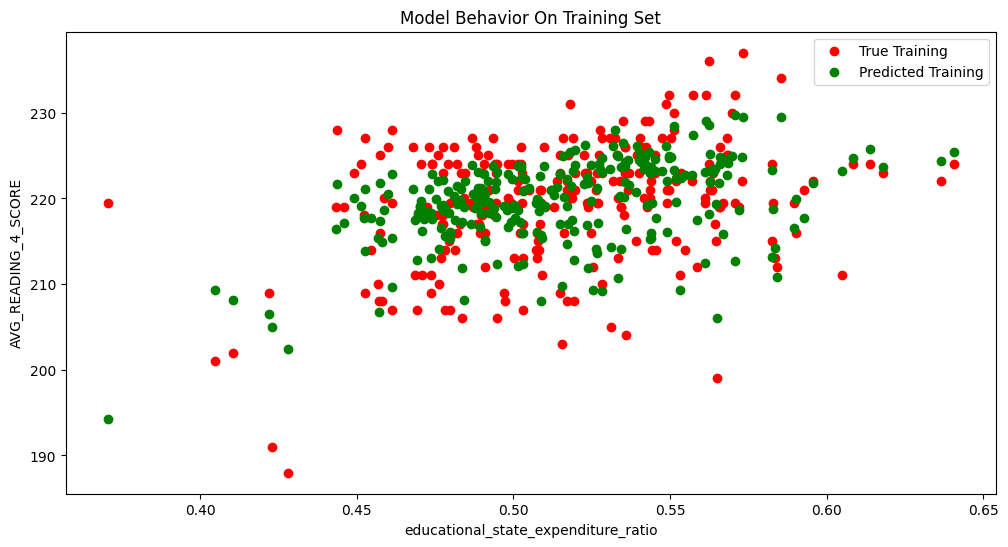

In [173]:
col_name = 'educational_state_expenditure_ratio'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

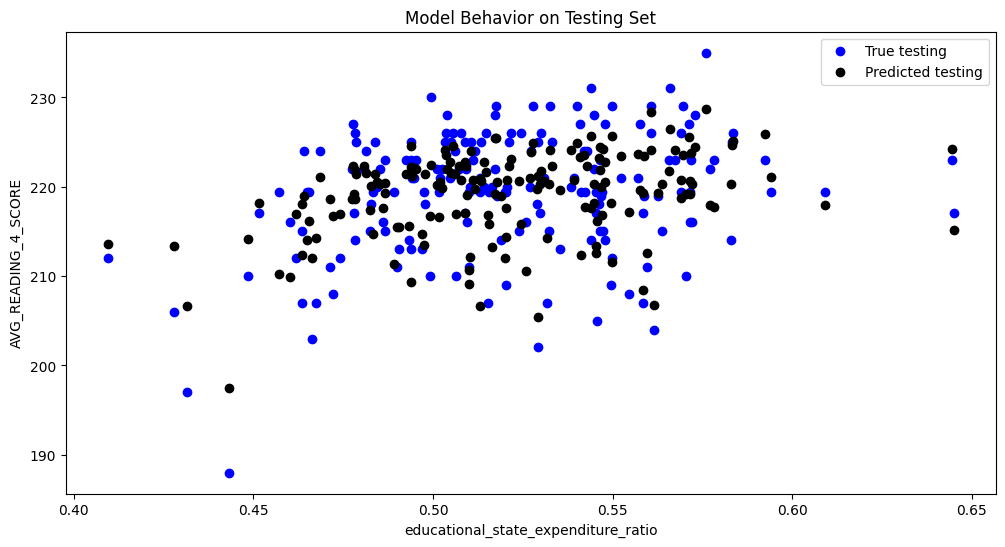

In [174]:
col_name = 'educational_state_expenditure_ratio'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4_SCORE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**


The model I created was given AVG_READING_4_SCORE as its response variable (y), and 4_GRADE_ENROLL, AVG_MATH_4_SCORE, and educational_state_expenditure_ratio as its input variable(X). 
Its R^2 score was 0.54 (rounded), which means only 54% of the the input variable can explain its relationship to output variable.
Its mean error is -0.187815140435075 and its absolute mean error is 3.854904350942488.
The first graph and second graph shows that even when more educational expenditure were to be increased, the average reading score for 4th grader will stagnant at 220.